# Name : Ayushi Singh

## Roll No : 200258

## Decision Tree using Python

### The data set includes information  about the content of the heart-disease directory.


Importing libraries

In [43]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [44]:
df = pd.read_csv("/content/mm.csv")

Data Analysis

In [45]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [46]:
df.shape

(303, 14)

There are 303 rows and 14 features in original dataset.

Description of features in dataset:

1.    age: age in years
2.    sex: sex (1 = male; 0 = female)
3.    cp: chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
4.    trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
5.    chol: serum cholestoral in mg/dl
6.    fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7.    restecg: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.    thalach: maximum heart rate achieved
9.    exang: exercise induced angina (1 = yes; 0 = no)
10.   oldpeak = ST depression induced by exercise relative to rest
11.   slope: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
12.   ca: number of major vessels (0-3) colored by flourosopy
13.   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.   num: diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


An easy way to check for missing values is to use the method isnull. We will get a data frame with true (1) and false (0) values, so we will sum the values and we can see in which column we have missing values.

In [48]:
data=df.copy()
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

We can see that there are 2 and 4 missing values in attributes 'ca' and 'thal' respectively.

The data we get is rarely homogenous. Sometimes data can be missing and it needs to be handled so that it does not reduce the performance of our machine learning model. To do this we need to replace the missing data by the Mean or Mode or Median of the entire column.

Here, the missing values are replaced with the mode value or most frequent value of the entire feature column. 

In [49]:
print(df.ca.mode())     # mode of ca
print(df.thal.mode())   # mode of thal

0    0.0
dtype: float64
0    3.0
dtype: float64


In [50]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])            
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [51]:
data=df.copy()
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

We can see now that there aren't any missing values now.

In [52]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Outliers are observations that lie on abnormal distance from other observations in the data and they will affect the regression dramatically. Because of this, the regression will try to place the line closer to these values.

The minimum value for 'trestbps' is 94, the maximum is 200 and the mean value is 131.689769. Also, we can see that 25% of the values are under 120 and 75% are under 140.

Similarly, the minimum value for 'chol' is 126, the maximum is 564 and the mean value is 246.693069. Also, we can see that 25% of the values are under 211 and 75% are under 275.

So, in this case both trestbps and chol contains outliers.

Boxplot captures the summary of the data effectively and efficiently with only a simple box and whiskers. It summarizes sample data using 25th, 50th, and 75th percentiles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


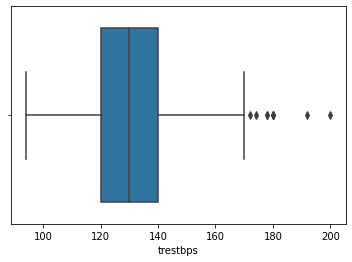

In [53]:
import seaborn as sns
sns.boxplot(df['trestbps'])

In the above graph, can clearly see those values above 170 approximately are acting as the outliers.

In [54]:
Q1 = np.percentile(df['trestbps'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['trestbps'], 75,
                   interpolation = 'midpoint')
IQR_1 = Q3 - Q1                                   # Inter Quartile Range of trestbps
upper_1 = np.where(df['trestbps'] >= (Q3+1.5*IQR_1))
lower_1 = np.where(df['trestbps'] <= (Q1-1.5*IQR_1))

In [55]:
df.drop(upper_1[0], inplace = True)
df.drop(lower_1[0], inplace = True)

Boxplot of 'trestbps' after removing outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


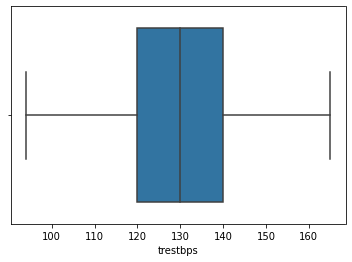

In [56]:
import seaborn as sns
sns.boxplot(df['trestbps'])

In [57]:
df.shape

(290, 14)

There are 290 rows and 14 features in the dataset after removing outliers of 'trestbps'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


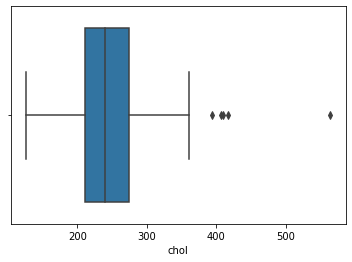

In [58]:
import seaborn as sns
sns.boxplot(df['chol'])

In the above graph, can clearly see those values above 400 approximately are acting as the outliers.

In [59]:
Q_1 = np.percentile(df['chol'], 25,
                   interpolation = 'midpoint')
Q_3 = np.percentile(df['chol'], 75,
                   interpolation = 'midpoint')
IQR_2 = Q_3 - Q_1                              # Inter Quartile Range of chol
upper_2 = np.where(df['chol'] >= (Q_3+1.5*IQR_2))
lower_2 = np.where(df['chol'] <= (Q_1-1.5*IQR_2))

In [60]:
df.drop(upper_2[0], inplace = True)
df.drop(lower_2[0], inplace = True)

Boxplot of 'chol' after removing outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


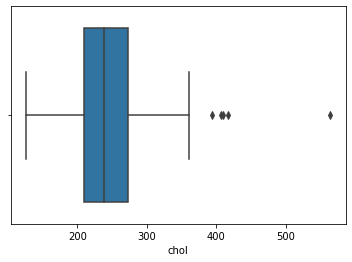

In [61]:
import seaborn as sns
sns.boxplot(df['chol'])

In [62]:
df.shape

(285, 14)

There are 285 rows and 14 features in the dataset after removing outliers of 'chol'.

In [63]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.235088,0.684211,3.161404,129.515789,245.101754,0.133333,0.971930,149.757895,0.308772,1.009474,1.585965,0.663158,4.652632,0.905263
std,9.149627,0.465647,0.946780,14.796647,52.107015,0.340533,0.996076,22.858898,0.462799,1.132000,0.608461,0.933838,1.927023,1.216729
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,273.000000,0.000000,2.000000,167.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,165.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The maximum value is still far away from the mean, but it is acceptably closer.

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.When VIF value is equal to 1, there is no multicollinearity at all. Values between 1 and 5 are considered perfectly okay.VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
vif=pd.DataFrame()
dt=add_constant(variables)
vif["VIF"]=[variance_inflation_factor(dt.values,i) for i in range(len(dt.columns))]
vif["features"]=dt.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,274.646950,const
1,1.501426,age
2,1.307711,sex
3,1.302582,cp
4,1.133863,trestbps
5,1.140292,chol
6,1.061835,fbs
7,1.087402,restecg
8,1.632393,thalach
9,1.398639,exang


These results show that our model doesn't have multicollinearity for any of the independent variables.

In [65]:
inputs = df.drop('num',axis='columns')
target = df.num

In [66]:
inputs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [67]:
target    #the predicted attribute

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 285, dtype: int64

Divide data into training and test sets.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [70]:
len(X_train)  # length of training set

228

In [71]:
len(X_test)   #length of test set

57

In [72]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)

In [73]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.43089561855670105, 0.9545454545454546, 'X[11] <= 0.5\ngini = 0.631\nsamples = 228\nvalue = [127, 41, 25, 25, 10]'),
 Text(0.22036082474226804, 0.8636363636363636, 'X[12] <= 6.5\ngini = 0.363\nsamples = 129\nvalue = [101, 19, 4, 4, 1]'),
 Text(0.16237113402061856, 0.7727272727272727, 'X[9] <= 2.8\ngini = 0.172\nsamples = 96\nvalue = [87, 8, 1, 0, 0]'),
 Text(0.12886597938144329, 0.6818181818181818, 'X[3] <= 157.0\ngini = 0.141\nsamples = 93\nvalue = [86, 6, 1, 0, 0]'),
 Text(0.09278350515463918, 0.5909090909090909, 'X[8] <= 0.5\ngini = 0.107\nsamples = 89\nvalue = [84, 4, 1, 0, 0]'),
 Text(0.05154639175257732, 0.5, 'X[4] <= 327.5\ngini = 0.05\nsamples = 78\nvalue = [76, 2, 0, 0, 0]'),
 Text(0.030927835051546393, 0.4090909090909091, 'X[3] <= 109.0\ngini = 0.027\nsamples = 74\nvalue = [73, 1, 0, 0, 0]'),
 Text(0.020618556701030927, 0.3181818181818182, 'X[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0, 0, 0]'),
 Text(0.010309278350515464, 0.22727272727272727, 'gini = 0.0\ns

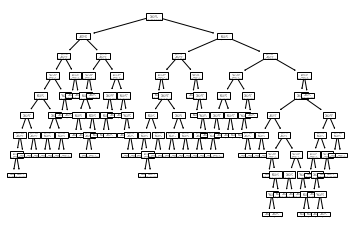

In [74]:
tree.plot_tree(model)

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [75]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [76]:
ccp_alphas

array([0.        , 0.00328947, 0.00389864, 0.0042735 , 0.00438596,
       0.00438596, 0.00438596, 0.00526316, 0.00548246, 0.00555556,
       0.00570175, 0.00570175, 0.00584795, 0.00584795, 0.00584795,
       0.00584795, 0.00614035, 0.00628263, 0.0064049 , 0.00651629,
       0.00651629, 0.00657895, 0.00657895, 0.00682261, 0.00701754,
       0.00709064, 0.00711501, 0.00730994, 0.0075188 , 0.0077789 ,
       0.00789474, 0.0090272 , 0.00908142, 0.00908869, 0.00914835,
       0.00917065, 0.01018297, 0.01216187, 0.0121777 , 0.01231388,
       0.01963419, 0.0288811 , 0.03413592, 0.08570675])

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

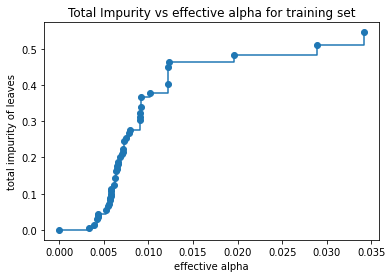

In [77]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [78]:
clfs = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    clfs.append(model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08570675294246766


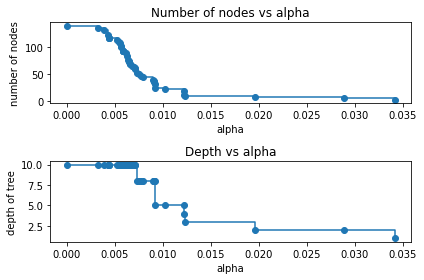

In [79]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in clfs]
depth = [model.tree_.max_depth for model in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Here we observe that the number of nodes and tree depth decreases as alpha increases.

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

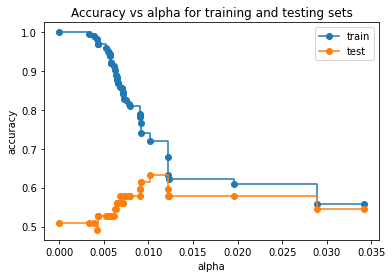

In [80]:
train_scores = [model.score(X_train, y_train) for model in clfs]
test_scores = [model.score(X_test, y_test) for model in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [81]:
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [82]:
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.631578947368421

[Text(0.4117647058823529, 0.9166666666666666, 'X[11] <= 0.5\ngini = 0.631\nsamples = 228\nvalue = [127, 41, 25, 25, 10]'),
 Text(0.11764705882352941, 0.75, 'X[12] <= 6.5\ngini = 0.363\nsamples = 129\nvalue = [101, 19, 4, 4, 1]'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.172\nsamples = 96\nvalue = [87, 8, 1, 0, 0]'),
 Text(0.17647058823529413, 0.5833333333333334, 'X[2] <= 3.5\ngini = 0.685\nsamples = 33\nvalue = [14, 11, 3, 4, 1]'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.48\nsamples = 15\nvalue = [10, 4, 0, 0, 1]'),
 Text(0.23529411764705882, 0.4166666666666667, 'X[7] <= 142.5\ngini = 0.722\nsamples = 18\nvalue = [4, 7, 3, 4, 0]'),
 Text(0.11764705882352941, 0.25, 'X[4] <= 251.0\ngini = 0.612\nsamples = 7\nvalue = [1, 0, 3, 3, 0]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [1, 0, 0, 3, 0]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(0.3529411764

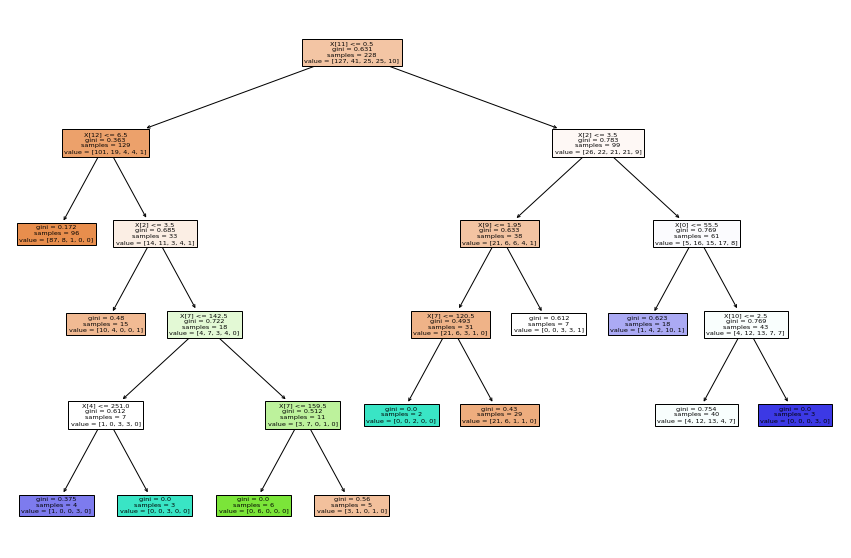

In [83]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [84]:
model.score(X_test,y_test)

0.631578947368421